<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 2. CNN Basis**
# Section 1. Convolution 연산 처리 with Keras

### _Objective_

1. 대부분의 합성곱 연산은 4차원의 데이터를 다룹니다. <br> 이를 어떻게 연산하는 지를 keras 을 활용해 배워봅니다. <br>
  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wget

<br><br>

# \[ 1. 합성곱 연산으로 특징 추출하기 \]

----

----

> *합성곱 연산은 딥러닝이 도입되기 이전부터, 컴퓨터비전 분야에서 영상 속 특징을 파악하기 위해,이용된 방법입니다.*<br>
> *몇 가지 예시를 통해, 어떤 식으로 특징을 추출하는지 파악해보도록 하겠습니다.*<br>

<br>

## 1. 합성곱 연산의 동작
----

* 합성곱을 연산하기 위해서는 입력 특징 맵과 필터가 필요합니다.<br>

### (1) 입력 특징 맵과 필터를 구성하기

In [2]:
features = np.arange(0,16).reshape(4,4)
features

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [3]:
filter = np.array([
    [1,0,2],
    [2,1,3],
    [3,1,2]
])

### (2)  합성곱 연산 수행하기

합성곱 연산은 특징 맵에서 필터의 크기만큼 패치를 추출합니다.<br>
해당 패치와 필터끼리 대응하는 원소끼리 곱한 후, 그 총합을 구합니다. 

In [4]:
# convolution 한후 결과가 담길 matrix 입니다. 
result_h = features.shape[0]- filter.shape[0] + 1
result_w = features.shape[1]- filter.shape[1] + 1
filter_h = filter.shape[0]
filter_w = filter.shape[1]
result = np.zeros([result_h, result_w])
for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = features[i:i+filter_h, j:j+filter_w] 
        # (2) 원소 별로 곱한 후 그 총합을 계산
        value = np.sum(patch * filter)
        # (3) 결과를 result에 저장
        result[i,j] = value
result

array([[ 88., 103.],
       [148., 163.]])

### (3) 합성곱 연산의 장점

1. 변수 공유 (Parameter Sharing): <br>
> 이미지의 한 부분에 유의미했던 필터가 다른 부분에서도 동일하게 유의미할 수 있습니다.<br>
> 이 덕분에 Parameter의 수가 획기적으로 줄어들 수 있었음

2. 희소 연결 (Sparsity of connections)
> 출력값이 이미지의 일부(작은 입력값)에 영향을 받고, 나머지 픽셀들의 영향을 거의 받지 않습니다.
> 이미지의 일부만 뽑아 처리하기 때문에, 과대적합 문제를 해결할 수 있습니다.

<br>
## 2. 예제 ) 선분 추출하기
----

간단한 필터를 통해, 어떤 식으로 영상에서 특징을 추출하는지를 파악할 수 있습니다.<br>

### (1) 이미지 구성하기

아래와 같이 체크무늬로 구성된 이미지를 만들어 보겠습니다.

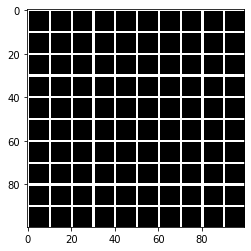

In [5]:
image = np.zeros((100,100),dtype=np.uint8)
# 10 pixel 씩 건너 뛰면서 행에 픽셀값 10을 부여 합니다. 
image[::10, :] = 10
# 10 pixel 씩 건너 뛰면서 열에 픽셀값 10을 부여 합니다. # 
image[:, ::10] = 10

plt.imshow(image,cmap='gray')
plt.show()

### (2) 필터 구성하기

아래의 필터는 수평방향에 대한 값의 변화를 잡는 필터입니다.<br>
아래 필터는 sobel filter로 영상 처리에서 수직선을 잡는데 쓰입니다.

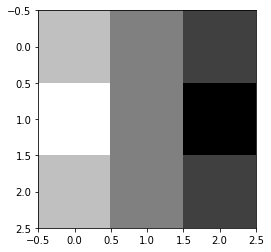

In [6]:
v_filter = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])
plt.imshow(v_filter,cmap='gray')
plt.show()

### (3) 합성곱 연산 수행하기

위의 필터는 수직 방향의 값이 바뀌는 부분에서만 Edge 부분에서만 값을 가집니다.

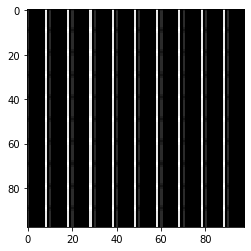

In [7]:
result_h = image.shape[0]- v_filter.shape[0] + 1
result_w = image.shape[1]- v_filter.shape[1] + 1
filter_h = v_filter.shape[0]
filter_w = v_filter.shape[1]
result = np.zeros([result_h, result_w], dtype=np.uint8)

for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = image[i:i+filter_h, j:j+filter_w] 
        # (2) 원소 별로 곱한 후 그 총합을 계산
        value = np.sum(patch * v_filter)
        # (3) 결과를 result에 저장
        result[i,j] = value
result
plt.imshow(result, cmap='gray')

### (4) 수평선 추출하기
반대로, 수평 방향으로 구성할 경우 우리는 수평방향 선분만을 추출할 수 있게 됩니다.

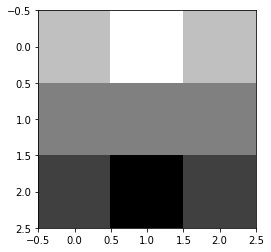

In [8]:
h_filter = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])
plt.imshow(h_filter,cmap='gray')
plt.show()

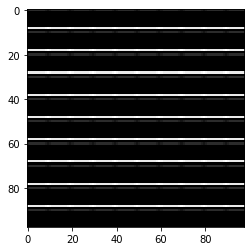

In [9]:
result_h = image.shape[0]- v_filter.shape[0] + 1
result_w = image.shape[1]- v_filter.shape[1] + 1
filter_h = h_filter.shape[0]
filter_w = h_filter.shape[1]
result = np.zeros([result_h, result_w], dtype=np.uint8)

for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = image[i:i+filter_h, j:j+filter_w] 
        # (2) 원소 별로 곱한 후 그 총합을 계산
        value = np.sum(patch * h_filter)
        # (3) 결과를 result에 저장
        result[i,j] = value
result
plt.imshow(result, cmap='gray')

<br>
## 3. 예제 ) 윤곽선 추출하기
----

위에서 이용한 수평 방향 필터와 수직 방향 필터의 조합으로<br>
윤곽선을 추출해보도록 하겠습니다.

### (1) 데이터 가져오기

손 이미지를 하나 가져와서, 손의 윤곽선을 추출해보도록 하겠습니다.<br>

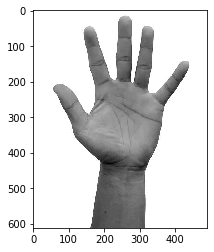

In [10]:
wget.download('https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/hands.jpg')
    
    
# open CV 을 이용해 image 을 load 합니다.
hand_image = cv2.imread('hands.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(hand_image,cmap='gray')
plt.show()

In [11]:
hand_image.shape

(612, 490)

### (2) 수직 방향, 수평 방향 성분 추출하기

아까와 동일하게 필터를 구성해 가져오도록 하겠습니다.

In [12]:
w_sobel = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])

h_sobel = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])


# hand_image 에 w_sobel filter 을 적용합니다. 
result_h = hand_image.shape[0]- w_sobel.shape[0] + 1
result_w = hand_image.shape[1]- w_sobel.shape[1] + 1
filter_h = w_sobel.shape[0]
filter_w = w_sobel.shape[1]

# w_sobel filter 을 convolution 한 결과를 저장합니다.
w_image = np.zeros([result_h, result_w], dtype=np.float32)
# h_sobel filter 을 convolution 한 결과를 저장합니다.
h_image = np.zeros([result_h, result_w], dtype=np.float32)
for i in range(result_h):
    for j in range(result_w):
        # (1) 특징 맵에서 필터크기 만큼 패치를 하나씩 가져옴
        patch = hand_image[i:i+filter_h, j:j+filter_w] 
        # (2) 원소 별로 곱한 후 그 총합을 계산
        w_value = np.sum(patch * w_sobel)
        h_value = np.sum(patch * h_sobel)
        # (3) 결과를 result에 저장
        w_image[i,j] = w_value
        h_image[i,j] = h_value

### (3) 수직 방향, 수평 방향 성분 시각화하기

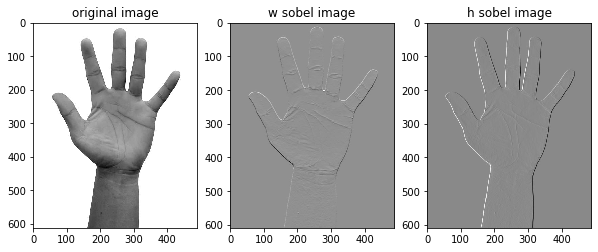

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,3,1)
ax.set_title('original image')
ax.imshow(hand_image,cmap='gray')
ax = fig.add_subplot(1,3,2)
ax.set_title('w sobel image')
ax.imshow(w_image, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.set_title('h sobel image')
ax.imshow(h_image, cmap='gray')
plt.show()

### (4) 윤곽선 추출하기

윤곽선은 수평 방향의 성분과 수직 방향의 성분의 제곱 합으로 구성됩니다.<br>

$$
I_{i,j} = \sqrt{W_{i,j}^2+H_{i,j}^2}
$$

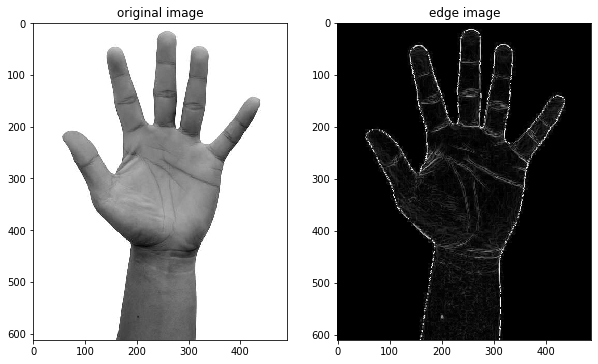

In [14]:
edge_image = np.sqrt(w_image**2+h_image**2)
edge_image = edge_image.astype(np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(hand_image,cmap='gray')
ax = fig.add_subplot(1,2,2)
ax.set_title('edge image')
ax.imshow(edge_image,cmap='gray')
plt.show()

### (5) Keras 을 활용한 윤곽선 추출하기

윤곽선은 수평 방향의 성분과 수직 방향의 성분의 제곱 합으로 구성됩니다.<br>

$$
I_{i,j} = \sqrt{W_{i,j}^2+H_{i,j}^2}
$$

In [41]:
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf 

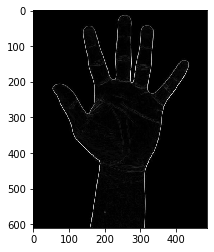

In [44]:
res_hand = np.reshape(hand_image, (1,612, 490,1))
inputs = Input(shape=(612, 490, 1))

w_conv = Conv2D(filters=1, kernel_size=3, name='w_conv2d', use_bias=False )(inputs)
res_w_sobel = w_sobel.reshape(3,3,1,1)

h_conv = Conv2D(filters=1, kernel_size=3, name='h_conv2d', use_bias=False )(inputs)
res_h_sobel = h_sobel.reshape(3,3,1,1)

filtered = tf.sqrt(w_conv **2 + h_conv**2)

model = Model(inputs, filtered)
model.get_layer('w_conv2d').set_weights([res_w_sobel])
model.get_layer('h_conv2d').set_weights([res_h_sobel])

pred = model.predict(res_hand)
sqz_pred = np.squeeze(pred)
plt.imshow(sqz_pred, cmap='gray')


---
⊙ Copyright(c) 2020 by PublicAI. All rights reserved <br>
All pictures, codes, writings cannot be copied without permission. <br>
Writen by PAI(info@publicai.co.kr) <br>
last updated on 2020/01/4 <br>

---